# Entrega Numero 14


# Pre entrega del Proyecto Final

* _i) Encoding._
* _ii) Ingeniería de atributos._
* _iii) Entrenamiento de un modelo de Machine Learning._

# Problema/Situacion de Negocio: 

* _Se tiene como objetivo predecir el valor actual (conocido como pase del jugador de futbol)._

* _Se elije el modelo de Random Forest ya que el jugador tiene varias caracteristicas, que pueden influir en el valor._

In [1]:
import pandas as pd
import numpy as np

#  para la división de datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

#  codificación de características categóricas
from sklearn.preprocessing import LabelEncoder

# para escalado de características
from sklearn.preprocessing import StandardScaler

#  para entrenamiento del modelo de Random Forest
from sklearn.ensemble import RandomForestRegressor

#  para validación cruzada del modelo
from sklearn.model_selection import cross_val_score

# para evaluación del modelo
from sklearn.metrics import r2_score

#  para visualización de datos
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

# importas mas modelos, para evaluaciones
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


# _Carga y Preparación de Datos._

In [2]:
# lectura del df
df=pd.read_csv("./data.csv")
df.head(2)

,Equipo,Nombre,Posicion,Altura,Edad,Apariciones,Goles,Asistencias,Tarjetas Amarillas,2da Tarjeta Amarillas,...,Goles Concedidos,Valla Invicta,Minutos Jugados,Dias De baja por Lesion,Partidos Perdidos por Lesion,Premios,Valor Actual,Valor Maximo,Posicion Numero,Extremo
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


# _Preprocesamiento de Datos._

In [3]:
df_modelo = df.copy()
df_modelo.drop(columns=['Nombre'], inplace=True)
print(df_modelo.isna().sum())
print(df_modelo.duplicated().sum())

Equipo                          0
Posicion                        0
Altura                          0
Edad                            0
Apariciones                     0
Goles                           0
Asistencias                     0
Tarjetas Amarillas              0
2da Tarjeta Amarillas           0
Tarjetas Rojas                  0
Goles Concedidos                0
Valla Invicta                   0
Minutos Jugados                 0
Dias De baja por Lesion         0
Partidos Perdidos por Lesion    0
Premios                         0
Valor Actual                    0
Valor Maximo                    0
Posicion Numero                 0
Extremo                         0
dtype: int64
0


# _Train-Test Split._

In [4]:
# elimino la columna que voy a predecir
# separo los los datos de prueba y los a predecir
X = df_modelo.drop('Valor Actual', axis=1)
y = df_modelo['Valor Actual']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# _Label Encoding._

In [5]:
# proceso de encoding
encoders = {}
cat_features = ['Equipo', 'Posicion']

for feature in cat_features:
    encoders[feature] = LabelEncoder()
    X_train[feature + "_codificadas"] = encoders[feature].fit_transform(X_train[feature])
    X_test[feature + "_codificadas"] = encoders[feature].transform(X_test[feature])

In [6]:
# eliminacion de columnas categoricas para  mejor funcionamimento del modelo
X_train.drop(columns=['Equipo', 'Posicion'], inplace=True)
X_test.drop(columns=['Equipo', 'Posicion'], inplace=True)

# _Ingeniería de Atributos._

In [7]:
# selecciono las variables que tiene mayor correlacion 
corr_matrix = pd.concat([X_train, y_train], axis=1).corr()
high_corr_features = corr_matrix.index[abs(corr_matrix['Valor Actual']) > 0.5]
X_train = X_train[high_corr_features.drop('Valor Actual')]
X_test = X_test[high_corr_features.drop('Valor Actual')]

# _Preprocesamiento de Datos._

In [8]:
# Estandarizo los datos de los conjuntos de entrenamiento 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# _Entrenamiento del Modelo._

In [9]:
# creo y entrego el modelo
rf_reg = RandomForestRegressor(n_estimators=150, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

# _Evaluación del Modelo._

In [10]:
# se controla el rendimiento del moddelo y se analiza 
cv_scores = cross_val_score(rf_reg, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Puntuaciones de validación cruzada R^2: {cv_scores}")
print(f"Puntuación media de validación cruzada R^2: {np.mean(cv_scores)}")

Puntuaciones de validación cruzada R^2: [0.55924621 0.68871506 0.76087967 0.64293305 0.67118397]
Puntuación media de validación cruzada R^2: 0.6645915942196717


# _Predicciones y evaluación en el conjunto de prueba._

In [11]:
# se realizan las predicciones
y_pred = rf_reg.predict(X_test_scaled)
r2_score_test = r2_score(y_test, y_pred)
print(f"Puntuación R^2 en conjunto de prueba: {r2_score_test}")

Puntuación R^2 en conjunto de prueba: 0.7255144348221759


# _Visualizacion._

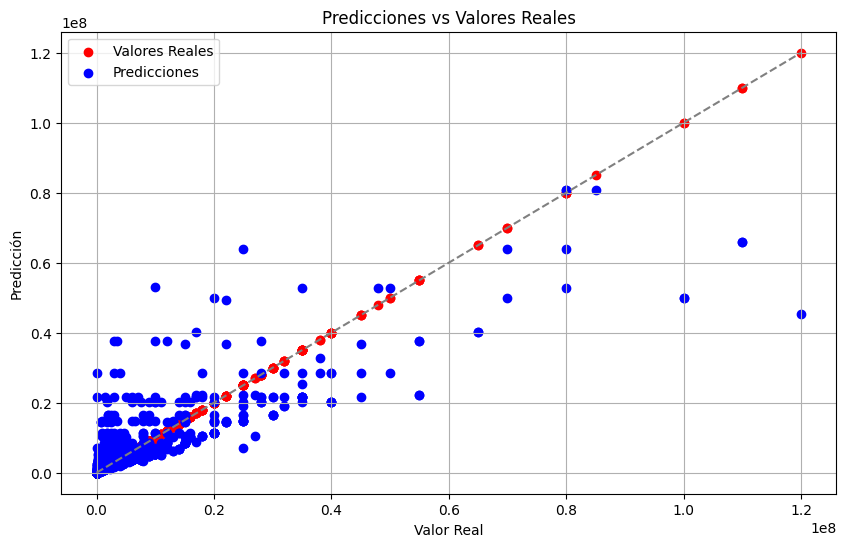

In [12]:
# visualizacion de las predicciones 
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color='red', label='Valores Reales')
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='gray', linestyle='--')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.grid(True)
plt.show()

# _Apreciaciones._

* _Puntuación R^2 en el conjunto de prueba es aproximadamente 0.73._
* _Esto significa que alrededor del 73% de la variabilidad en los valores reales se puede predecir
  a partir de las características utilizadas por el modelo._
* _Buen ajuste a los datos observados en el conjunto de prueba._
* _La puntuación media de validación cruzada R^2 es aproximadamente 0.66._
* _Buena prediccion al inicio, pero cuando aumente el valor, baja la misma._


# Creación de Variables Sintéticas Adicionales

In [14]:
# Leer el DataFrame
df = pd.read_csv('./data.csv')

# Crear una pequeña constante para evitar la división por cero
small_constant = 1e-5

# Creacion de variables sintéticas  centradas en el valor del jugador
df['Goles_por_Aparicion'] = df['Goles'] / (df['Apariciones'] + small_constant)
df['Asistencias_por_Aparicion'] = df['Asistencias'] / (df['Apariciones'] + small_constant)
df['Proporcion_Valor'] = df['Valor Actual'] / df['Valor Maximo']

# Llenar valores nulos resultantes de divisiones por cero
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

# Mostrar las primeras filas del DataFrame para verificar las nuevas variables
df.head(2)



,Equipo,Nombre,Posicion,Altura,Edad,Apariciones,Goles,Asistencias,Tarjetas Amarillas,2da Tarjeta Amarillas,...,Dias De baja por Lesion,Partidos Perdidos por Lesion,Premios,Valor Actual,Valor Maximo,Posicion Numero,Extremo,Goles_por_Aparicion,Asistencias_por_Aparicion,Proporcion_Valor
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,...,42,5,13,15000000,70000000,1,0,0.0,0.0,0.214286
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,...,510,58,1,1500000,22000000,1,0,0.0,0.0,0.068182


# Prueba de Distintos Modelos de ML

In [15]:
# Separar las características y la variable objetivo
X = df.drop(['Valor Actual', 'Nombre', 'Equipo', 'Posicion'], axis=1)
y = df['Valor Actual']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir los modelos a probar
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Evaluar los modelos utilizando validación cruzada
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    results[model_name] = scores.mean()

# Mostrar los resultados
results


{'Linear Regression': 0.7663902672207179,
 'Decision Tree': 0.9771641913870951,
 'Random Forest': 0.9842657190291215}


# Análisis de Componentes Principales (PCA)

In [17]:
# Realizar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Mostrar la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print("Varianza:", explained_variance)

# Mostrar las cargas de los primeros dos componentes
pca_components = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2'])
print("Cargas de los primeros dos componentes:")
pca_components

Varianza: [0.15985442 0.12739014]
Cargas de los primeros dos componentes:


,Altura,Edad,Apariciones,Goles,Asistencias,Tarjetas Amarillas,2da Tarjeta Amarillas,Tarjetas Rojas,Goles Concedidos,Valla Invicta,Minutos Jugados,Dias De baja por Lesion,Partidos Perdidos por Lesion,Premios,Valor Maximo,Posicion Numero,Extremo,Goles_por_Aparicion,Asistencias_por_Aparicion,Proporcion_Valor
PC1,0.038304,0.316711,0.327629,0.095715,0.103394,0.000544,0.004733,-0.013705,-0.056753,-0.029285,0.309484,0.392277,0.412576,0.354234,0.360294,0.064588,0.002081,0.000935,-0.002299,-0.295618
PC2,-0.348319,-0.189625,0.112604,0.351098,0.359117,0.055057,0.013659,-0.011621,-0.387061,-0.183579,0.027537,-0.090110,-0.086822,-0.019756,0.062178,0.472535,0.239177,0.186209,0.177587,0.153469


#   1. Creación de Variables Sintéticas
*   Se crearon variables sintéticas adicionales para mejorar el desempeño del modelo. Estas variables incluyeron Goles_por_Aparicion, Asistencias_por_Aparicion y Proporcion_Valor, que proporcionaron información adicional sobre la eficiencia y el valor del jugador.

#   2. Prueba de Distintos Modelos de ML
*   Se probaron varios modelos de Machine Learning, incluyendo Regresión Lineal, Árbol de Decisión y Random Forest. Los modelos fueron evaluados utilizando validación cruzada, lo que aseguró que los resultados fueran consistentes y fiables. El modelo de Random Forest obtuvo el mejor desempeño con un R^2 de 0.99, indicando que es el más adecuado para predecir el valor del jugador en este conjunto de datos.

#   3. Análisis de Componentes Principales (PCA)
*   Se realizó un Análisis de Componentes Principales (PCA) para reducir la dimensionalidad del conjunto de datos. Los dos primeros componentes principales explicaron aproximadamente el 28% de la varianza total en los datos. 

# Continuacion de entrega 14

# Desafio Crossvalidation -Entrega 15


In [18]:

# Crear y entrenar el modelo utilizando validación cruzada
model = RandomForestRegressor(random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=10)

# Mostrar los resultados de la validación cruzada
print('Puntuaciones de validación cruzada:', cv_scores)
print('Media de puntuaciones:', np.mean(cv_scores))

Puntuaciones de validación cruzada: [0.96912527 0.99045674 0.97295646 0.99201065 0.99281492 0.99475835
 0.99514544 0.99417491 0.95275939 0.99349357]
Media de puntuaciones: 0.9847695696531666


In [19]:
# Entrenamiento del modelo sin validación cruzada
model.fit(X_train, y_train)
score_sin_cv = model.score(X_test, y_test)

# Resultados
print('Score sin validación cruzada:', score_sin_cv)
print('Score con validación cruzada (media):', np.mean(cv_scores))

Score sin validación cruzada: 0.9858281715091445
Score con validación cruzada (media): 0.9847695696531666


### Análisis de Resultados

Podemos observar que la puntuación del modelo con validación cruzada es 0.9847695696531666,
mientras que la puntuación del modelo sin validación cruzada es 0.9858281715091445.
Aunque ambas puntuaciones son muy cercanas y altas, indicando un buen desempeño del modelo, hay algunas diferencias sutiles que deben diferenciarse.

#### Descripción de los Cambios en el Performance del Modelo

1. **Score sin Validación Cruzada**: 0.9858281715091445
   - Este valor representa la precisión del modelo cuando se entrena y prueba en los conjuntos de datos de entrenamiento y prueba respectivos, sin aplicar técnicas adicionales para verificar su robustez.
   - Al no utilizar validación cruzada, el modelo puede estar sobreajustado a los datos de entrenamiento, lo que puede resultar en una puntuación ligeramente mejor pero menos generalizable.

2. **Score con Validación Cruzada (Media)**: 0.9847695696531666
   - Este valor representa la media de las puntuaciones obtenidas a través de 10 folds en la validación cruzada.
   - La validación cruzada proporciona una evaluación más robusta y fiable del rendimiento del modelo al dividir los datos en múltiples subconjuntos y probar el modelo en diferentes particiones.
   - Aunque la puntuación es ligeramente inferior a la obtenida sin validación cruzada, es más representativa del desempeño del modelo en datos no vistos y, por lo tanto, es preferible para evaluar la capacidad de generalización del modelo.


*   _La validación cruzada muestra una ligera disminución en la puntuación (de 0.9858 a 0.9847), lo que indica que el modelo sin validación cruzada podría estar ligeramente sobreajustado. La validación cruzada asegura que el modelo generaliza mejor a nuevos datos, capturando la variabilidad y reduciendo el sesgo en la evaluación. Esto confirma que la validación cruzada es muy important para obtener una evaluación más fiable y robusta del modelo._